# Demonstration of `df_binary_states2summary_df.py`

Demonstrating use of `df_binary_states2summary_df.py`, see [here](https://github.com/fomightez/text_mining) for more information.

This script converts a dataframe or data table of text into a summary.  

**This script only works with data that has binary state / or subgroups and assumes the other from calculation by 100%.** Two states typically have one that is considered the 'positive' or featured one, such as among 'present/not present' or 'yes/no'.  
See [this notebook](index.ipynb) demonstrating `df_subgroups_states2summary_df.py` if you have more than two states / subgroups.

-----

The two main ways of using the script are covered, featuring several of the options available.

## Preparation and displaying USAGE block

Let's get the script and run 'Help' on it to see the basic USAGE block.

(If you are running this notebook in the session launched from the repo that includes the script, this step is not necessary. However, it is included because there is no harm in running it here and you may be wanting to run this elsewhere or see how to easily acquire the script. If you are on the actual command line, you'd leave off the exclamation point.)

In [1]:
import os
file_needed = "df_binary_states2summary_df.py"
if not os.path.isfile(file_needed):
    !curl -OL https://raw.githubusercontent.com/fomightez/text_mining/master/df_binary_states2summary_df.py

In [2]:
%run df_binary_states2summary_df.py -h

usage: df_binary_states2summary_df.py [-h] [-olsp] [-bc]
                                      DF_FILE GROUPS STATES_COL STATE_TO_SHOW

df_binary_states2summary_df.py takes a dataframe, and some information about
columns in the dataframe and makes a summary data table with the percent for a
specified state per total and each group / category. **** Script by Wayne
Decatur (fomightez @ github) ***

positional arguments:
  DF_FILE               Name of file containing the dataframe. Whether it is
                        in the form of a pickled dataframe, tab-separated
                        text, or comma-separated text needs to be indicated by
                        the file extension. So `.pkl`, `.tsv`, or `.csv` for
                        the file extension.
  GROUPS                Text indicating column in dataframe to use as main
                        grouping categories.
  STATES_COL            Text indicating column in dataframe to use as the
                        binary st

## Use the script by calling it from the command line

A dataframe  or text data table will be used for input data. To fully demonstrate the options for the script we'll use a toy dataframe and also convert it to a text table.

In [3]:
import pandas as pd
sales = [('Jones LLC', 177887, 'yes'),
         ('Alpha Co', 157987, 'yes'),
         ('Alpha Co', 158981, 'yes'),
         ('Alpha Co', 159983, 'yes'),
         ('Alpha Co', 167987, 'yes'),
         ('Alpha Co', 158117, 'yes'),
         ('Alpha Co', 159333, 'no'),
         ('Alpha Co', 256521, 'no'),
         ('Blue Inc', 111947, 'no')]
labels = ['Manufacturer', 'Item', 'In_Stock']
df = pd.DataFrame.from_records(sales, columns=labels)
df.head()

,Manufacturer,Item,In_Stock
0,Jones LLC,177887,yes
1,Alpha Co,157987,yes
2,Alpha Co,158981,yes
3,Alpha Co,159983,yes
4,Alpha Co,167987,yes


Let's save that dataframe as tabular text and also as a Pickled pickled dataframe. The former being human readable and the latter not. (The latter is more efficient at storage though if that is an issue.)

First to save as tabular text in tab-separated form. You could change it to be comma-separated, CSV, if you choose.

In [4]:
df.to_pickle("data.pkl")
df.to_csv('data.tsv', sep='\t',index = False)

Now that we have files with input data, we have something we can point the script at for running it.

In addition to providing the data input file name, three other items need to be provided when calling the script. You need also to provide:  
(1) the text corresponding to the column heading of the groupings,  
(2) the text corresponding to the column containing the states /or subgroups, and  
(3) the text corresponding to the ONE 'positive' or featured state or subgroup to display.

In regards to item 3, the amounts of the other state or subgroup in the binary set will be inferred from the summary table by substraction from 100%. For example, if you are using 'present/absent' as the states, the 'absent' component would be determined by subtracting the amount of the 'positive' case of presence from 100%.

In [5]:
%run df_binary_states2summary_df.py data.pkl Manufacturer In_Stock yes

Summary dataframe saved as a text table easily opened in
different software; file named: `summary_data.tsv`

Summary dataframe saved in pickled form for ease of use within
Python; file named: `summary_data.pkl`. This will retain the column headers/names formatting best.

In [6]:
t = pd.read_pickle("summary_data.pkl")
t

yes          
          [n] count         %
ALL         9     6  0.666667
Alpha Co    7     5  0.714286
Blue Inc    1     0  0.000000
Jones LLC   1     1  1.000000

The text in the displayed view of the dataframe can be styled better without changing the actual underlying data. Here we fix the `%` column to show it as a percent with two-decimal places represented. At the same time a title can also be added for display.

In [7]:
# This would change the view to be nicer; note the underlying dataframe remains untouched
t_styl = t.style.format("{:.2%}",subset=[('yes','%')]) # based on https://stackoverflow.com/a/56411982/8508004
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html
# Trick to add a title to the dataframe
from IPython.display import display, HTML
# trick from https://stackoverflow.com/a/29665452/8508004
display(HTML('<b>Items in stock by Manufacturer:</b>'))
display(t_styl)

The sparsification of the column names and not all the states/ subgroups being represented makes it a little hard to read. In other words, you might question ,"Why is there an `[n]` and `count`?" And not realize that `count` belongs to `yes`. Using the suggestion [here](http://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html), you can un-"sparsify" the display style:

In [8]:
with pd.option_context('display.multi_sparse', False):
    display(t)

,,yes,yes
,[n],count,%
ALL,9,6,0.666667
Alpha Co,7,5,0.714286
Blue Inc,1,0,0.000000
Jones LLC,1,1,1.000000


(Related to the column names sparsification, I note that, when in the classic notebook interface, the default dataframe has the top level column names show on the left, and they shift to being right-aligned in the dataframe with the format styling of the percent column. If you are seeing this and want more standardized, switch to using the JupyterLab interface because it seems the top-level column headings stay right-aligned. It is easy to go from the classic interface to the JupyterLab if you first go to the dashboard/file browser in the classic interface by clicking on the Jupyter logo in the upper right. From the dashboard, change the end of the url from `/tree` to `/lab`. The screen will refresh and you'll be in the JupyterLab interface. (Just change `/lab` at the end back to `/tree` to switch back to the classic interface.)

The style formatting of the values and the desparsification can even be combined:

In [9]:
# This would change the view to be nicer; note the underlying dataframe remains untouched
t_styl = t.style.format("{:.2%}",subset=[('yes','%')]) # based on https://stackoverflow.com/a/56411982/8508004
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html
# Trick to add a title to the dataframe
from IPython.display import display, HTML
# trick from https://stackoverflow.com/a/29665452/8508004
display(HTML('<b>Items in stock by Manufacturer:</b>'))
with pd.option_context('display.multi_sparse', False):
    display(t_styl)

,,yes,yes
,[n],count,%
ALL,9,6,66.67%
Alpha Co,7,5,71.43%
Blue Inc,1,0,0.00%
Jones LLC,1,1,100.00%


That covers the basics. However, the script can be called with several arguments to specify the output style.

**Leave only the states / subgroups percent**

Another optional flag for when calling the script is `--only_subgrp_perc`, abbreivated `-olsp`, to remove the counts for each state / subgroup to just leave the percent accounting for each state subgroup.

In [10]:
%run df_binary_states2summary_df.py data.pkl Manufacturer In_Stock yes --only_subgrp_perc

Summary dataframe saved as a text table easily opened in
different software; file named: `summary_data.tsv`

Summary dataframe saved in pickled form for ease of use within
Python; file named: `summary_data.pkl`. This will retain the column headers/names formatting best.

In [11]:
m = pd.read_pickle("summary_data.pkl")
m

,[n],In_Stock
ALL,9,0.666667
Alpha Co,7,0.714286
Blue Inc,1,0.000000
Jones LLC,1,1.000000


In [12]:
# This would change the view to be nicer; note the underlying dataframe remains unotuched
m_styl = m.style.format("{:.2%}",subset=[('In_Stock')]) # based on https://stackoverflow.com/a/56411982/8508004
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html
m_styl

,[n],In_Stock
ALL,9,66.67%
Alpha Co,7,71.43%
Blue Inc,1,0.00%
Jones LLC,1,100.00%


...or use code to specify column name source...

In [13]:
# This would change the view to be nicer; note the underlying dataframe remains unotuched
m_styl = m.style.format("{:.2%}",subset=m.columns[1:]) # based on https://stackoverflow.com/a/56411982/8508004
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html
m_styl

,[n],In_Stock
ALL,9,66.67%
Alpha Co,7,71.43%
Blue Inc,1,0.00%
Jones LLC,1,100.00%


**Put the counts in brackets after the percent**

Another optional flag for when calling the script is `--bracket_counts`, abbreivated `-bc`, to move the counts for each state / subgroup to be inside brackets following the percent. Note that this is simply meant for making better, succint summaries for presentations because it actually combines two represenations in a single cell which isn't straighforward to use for subsequent analysis. And in fact it returns a simpler version with the numbers still as numbers in separate *in addition* to highlight that and still provide for working with the data further.

In [14]:
%run df_binary_states2summary_df.py data.pkl Manufacturer In_Stock yes --bracket_counts

Summary dataframe saved as a text table easily opened in
different software; file named: `summary_data.tsv`. This version meant for presenation only.

Summary dataframe saved in pickled form for ease of use within
Python; file named: `summary_data.pkl`. This version meant for
presentation only.


**Also saving data table as forms easier to handle for subsequent steps:**
Summary dataframe saved as a text table easily opened in
different software; file named: `summary_basic_data.tsv`

Summary dataframe saved in pickled form for ease of use within
Python; file named: `summary_basic_data.pkl`. This will retain the column headers/names formatting best.

Note the exta feedback about the more basic version of the summary also being returned.

Let's look at the more summarized version.

In [15]:
bc = pd.read_pickle("summary_data.pkl")
bc

,[n],In_Stock
ALL,9.0,66.67% [6]
Alpha Co,7.0,71.43% [5]
Blue Inc,1.0,0.00% [0]
Jones LLC,1.0,100.00% [1]


However, note in addition to the one made for presentation there is the other produced by the single script execution as well:

In [16]:
mb = pd.read_pickle("summary_basic_data.pkl")
mb

yes          
          [n] count         %
ALL         9     6  0.666667
Alpha Co    7     5  0.714286
Blue Inc    1     0  0.000000
Jones LLC   1     1  1.000000

Additional customization of naming of the output files is possible simply editing settings under the 'USER ADJUSTABLE VALUES' section in the script code file.


----

## Use script in a Jupyter or IPython by calling the main function

This will demonstrate importing the main function into a Jupyer environment or IPython console.

Note that it gives you a few more options because it exposes more control, such as allowing you to specify an order for when the column names actually include spaces.

First, we'll use the files for the dataframe and tabular text saved earlier in the example. After that will move on to not using files and instead use Python objects that are in the memory of the notebook. No need for file intermediates is one of the advantages of using the main function of the script this way.

We will need to import the main function of the script to be active in the running notebook environment. (There is no harm to running it again even if already run in earlier sections.)

In [17]:
from df_binary_states2summary_df import df_binary_states2summary_df

Now to try using that with the files from earlier in the demonstration.

First, we'll use the tab-separated table.

It is very similar to using the script from the command line. Here, though we have to specify the input type as file or an in-memory dataframe when we call the function. Provide a file name for `df_file` for using a data file as input. Then specify the colum with the binary data and the column to use in grouping like the following. The one state to feature as displayed has to be provided. These have to be provided as Python strings.

In [18]:
sum_df = df_binary_states2summary_df(df_file="data.tsv",groups_col="Manufacturer", states_col="In_Stock", display_state="yes");

Summary dataframe returned.

Let's view the returned dataframe.

In [19]:
sum_df

yes          
          [n] count         %
ALL         9     6  0.666667
Alpha Co    7     5  0.714286
Blue Inc    1     0  0.000000
Jones LLC   1     1  1.000000

However, the function can also take an in-memory dataframe directly. Let's next see a demonstration of that. 

To be sure a dataframe is in memory, we'll read in one from the file saved earlier.  
You may note that this step is redundant if you are running all these cells in order, and the one made earlier is in memory still; however, I want to be sure all is on the same page before the next steps while emphasizing here the switch from using a file as data to something in the memory of the current notebook.

In [20]:
df = pd.read_pickle("data.pkl")

We can look at the start of that dataframe to verify it is in memory now.

In [21]:
df.head()

,Manufacturer,Item,In_Stock
0,Jones LLC,177887,yes
1,Alpha Co,157987,yes
2,Alpha Co,158981,yes
3,Alpha Co,159983,yes
4,Alpha Co,167987,yes


In [22]:
sum_df = df_binary_states2summary_df(df=df,groups_col="Manufacturer", states_col="In_Stock", display_state="yes");
sum_df

Summary dataframe returned.

yes          
          [n] count         %
ALL         9     6  0.666667
Alpha Co    7     5  0.714286
Blue Inc    1     0  0.000000
Jones LLC   1     1  1.000000

The output from using the main function can be viewed and formatted just as when using the script from the equivalent of the command line.

In [23]:
# This would change the view to be nicer; note the underlying dataframe remains unotuched
sum_df_styl = sum_df.style.format("{:.2%}",subset=[('yes','%')]) # based on https://stackoverflow.com/a/56411982/8508004
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html
sum_df_styl

Just as with calling the command line version, there are number of additional arguments that can be specified to control the output. The rest of this section will illustrate those.

**Leave only the states / subgroups percent**

Another optional setting to specify when calling the function is to assign `only_subgrp_perc` as `True` to remove the counts for each state / subgroup to just leave the percent accounting for each state subgroup. 
It defaults to `False` if not specified.

In [24]:
psum_df = df_binary_states2summary_df(df=df,groups_col="Manufacturer", states_col="In_Stock", display_state="yes", only_subgrp_perc=True);
psum_df

Summary dataframe returned.

,[n],In_Stock
ALL,9,0.666667
Alpha Co,7,0.714286
Blue Inc,1,0.000000
Jones LLC,1,1.000000


In [25]:
# This would change the view to be nicer; note the underlying dataframe remains unotuched
psum_df_styl = psum_df.style.format("{:.2%}",subset=psum_df.columns[1:])
psum_df_styl

,[n],In_Stock
ALL,9,66.67%
Alpha Co,7,71.43%
Blue Inc,1,0.00%
Jones LLC,1,100.00%


**Put the counts in brackets after the percent**

Another optional setting to specify when calling the function is to assign `bracket_counts` as `True` to move the counts for each state / subgroup to be inside brackets following the percent.  Note that this is simply meant for making better, succint summaries for presentations because it actually combines two represenations in a single cell which isn't straighforward to use for subsequent analysis. And in fact it returns a simpler version with the numbers still as numbers in separate *in addition* to highlight that and still provide for working with the data further.  
It defaults to `False` if not specified.
**Be aware this returns two dataframes.**

In [26]:
bcsum_df,basic_df = df_binary_states2summary_df(df=df,groups_col="Manufacturer", states_col="In_Stock", display_state="yes",bracket_counts=True);
bcsum_df

Summary dataframes returned. First is for presentation only with percent and counts as text in a single cell; second returned is basics with counts and percent data as integer and floats, respectively.

,[n],In_Stock
ALL,9.0,66.67% [6]
Alpha Co,7.0,71.43% [5]
Blue Inc,1.0,0.00% [0]
Jones LLC,1.0,100.00% [1]


Because that one is great for presentation but not for processing numbers further, there is another returned at the same time. This is more like the simple result normally returned. You would use that to work further with the data.  
The other one returned with the use of the function above is shown next just for the sake of clarity here:

In [27]:
basic_df

yes          
          [n] count         %
ALL         9     6  0.666667
Alpha Co    7     5  0.714286
Blue Inc    1     0  0.000000
Jones LLC   1     1  1.000000

-----

## Plug for donut plots for complementing these summaries

I made some visual plotting scripts and functions that can complement these uses of `df_subgroups_states2summary_df`. A demo is in the next cell using the same starting dataframe as input. This example uses the main function of one of these scripts; however, each script can be used from the command line as well.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33791  100 33791    0     0   232k      0 --:--:-- --:--:-- --:--:--  230k


Plot figure object returned.

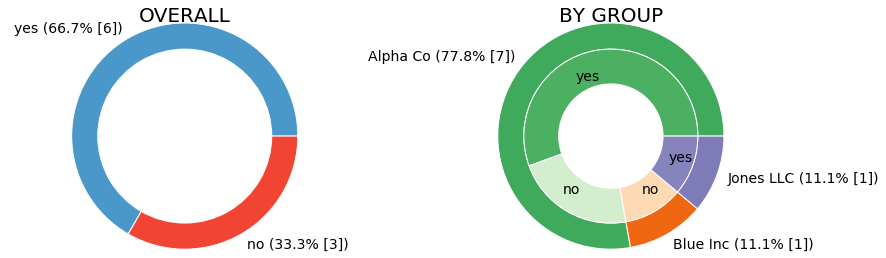

In [28]:
import os
file_needed = "donut_plot_with_total_binary_summary_and_binary_state_subgroups.py"
if not os.path.isfile(file_needed):
    !curl -OL https://raw.githubusercontent.com/fomightez/donut_plots_with_subgroups/master/donut_plot_with_total_binary_summary_and_binary_state_subgroups.py
from donut_plot_with_total_binary_summary_and_binary_state_subgroups import donut_plot_with_total_binary_summary_and_binary_state_subgroups
p = donut_plot_with_total_binary_summary_and_binary_state_subgroups(df=df,binary_state_col ="In_Stock",grouping_col="Manufacturer", hilolist=["yes", "no"]);

That is just a small example of the possibilities. There are other options for that script/function and related scripts as well.  
See about these donut plots [here](https://github.com/fomightez/donut_plots_with_subgroups).

---

This is the last notebook in the series.

Go back a notebook in the series by clicking [here &#11013;](index.ipynb).

----
----